# OMP (Orthogonal Matching Pursuit)
### Instituto Nacional de Astrofisica, Optica y Electrónica
### Matematicas de la Computación
### Dra. Hayde Peregrina Barreto
### M.Sc. Ciencias de la Computación
#### A. Ruiz, J. Fuentes, L. Arellano

In [4]:
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
from scipy.io import wavfile

#Se extrae los datos y la frecuenci de muestreo 
fs, data = wavfile.read("C:/Users/Yosef/HolaDra3.wav")
data = data/2.0**15
#fs es igual a 100 frames de 160 muestreos cada uno.
data=data[0:fs*67]
# Data de entrenamiento (1 min =60 Frame Samples(fs))
training_data = data[0:fs*60]
training_data = training_data.reshape(6000,160)

### Audio Original  
Se grafica los valores del audio desde el segundo $0$ ($t_{0}$) hasta el $67$ ($t_{f}$), para ello se hace uso de $\textit{fs}$ ($\textit{frame sample}$). Y se crea un cuadro de audio para su reproducción 

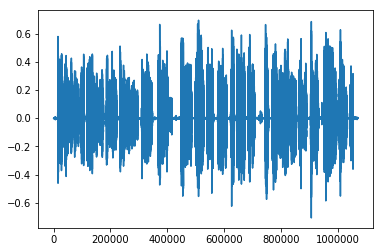

In [5]:
%matplotlib inline

plt.plot(data[fs*0:fs*67])

from IPython.display import Audio
Audio(rate=fs, data=data[fs*0:fs*67])

### Visualización de  un $fs$
Aquí hemos seleccionado el $fs$ número 10 de nuestro $training data$. Este representa una $1/100$ de un segundo.

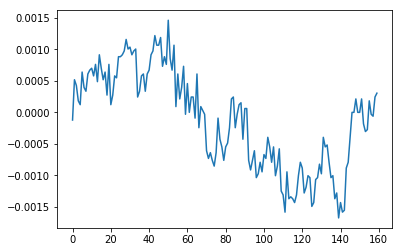

In [6]:
# Ejemplo de frame
plt.plot(training_data[10])
data2=training_data[10].reshape(-1,1)
Audio(data=training_data[10],rate=fs)

### Creación de nuestro diccionario $d$.
Como podemos observar, se hace uso de una función de la librería $\textit{sklearn}$ para poder generar y entrenar un diccionario $d$ que tenga afinidad con nuestra $training data$.

In [12]:
# Construccion del diccionario
from sklearn.decomposition import MiniBatchDictionaryLearning
from time import time
t0 = time()
dico = MiniBatchDictionaryLearning(n_components=160*4, alpha=1, n_iter=200)
D = dico.fit(training_data).components_
t1 = time() - t0
print('Tiempo de entrenamiento en %d segundos' % t1)

Tiempo de entrenamiento en 16 segundos


### Visualización de átomos.

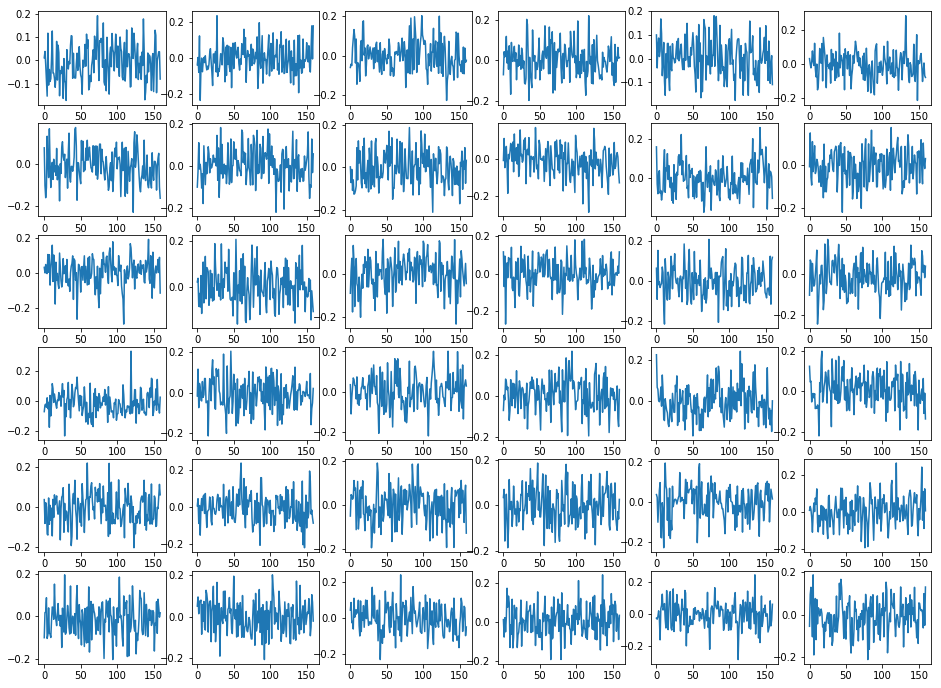

In [13]:
import itertools
# Ejemplos de diccionario
fig, axes = plt.subplots(6,6)
fig.set_size_inches(16,12)
for i, j in itertools.product(range(1,7), range(6)):
    axes[i-1][j].plot(D[6*(i-1)+j])

### Compresión de la señal $y$. (OMP)

In [14]:

# Datos a representar
test_data = data[fs*60:fs*67].reshape(700, 160)

# Reconstruccion con 100 atomos
result = np.ndarray((test_data.shape[0],512))

from sklearn.decomposition import SparseCoder

coder = SparseCoder(dictionary = D, transform_n_nonzero_coefs=100, transform_alpha=None, transform_algorithm="omp")

t0 = time()
result = coder.transform(test_data)
t1 = time() - t0
print('Compresión terminada en %d segundos.' % t1)

Compresión terminada en 25 segundos.


### Visualización Coefecientes Atomicos.

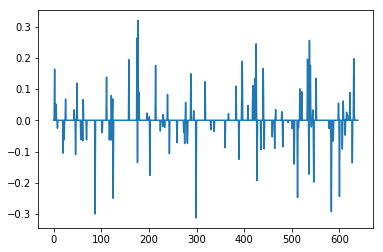

In [18]:
plt.plot(result[436])

### Reconstrucción de señal $y'$

In [15]:
orig = data[fs*60:fs*67]
out = np.zeros(orig.shape)

for n in range(result.shape[0]):
    out[n*160:(n+1)*160] = np.sum(D.T*result[n],axis=1)

### Visualización de señal $y'$

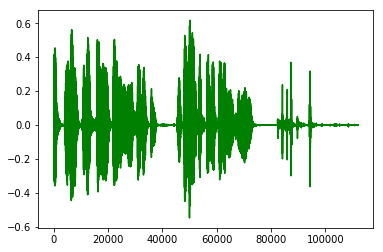

In [16]:
plt.plot(out, 'g')
Audio(data=out,rate=fs)

### Comparación $y$, $y'$, $e$.

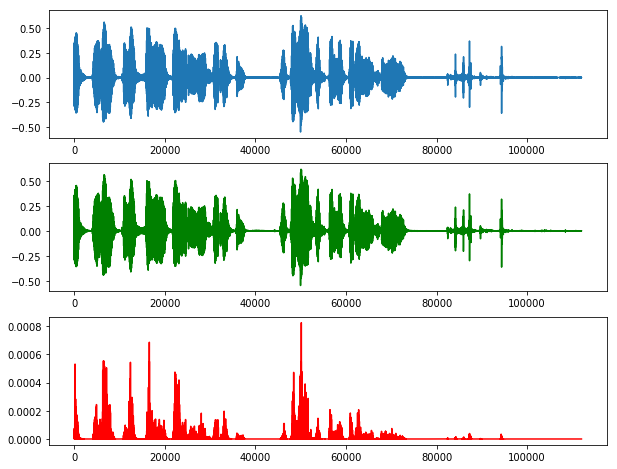

In [17]:
fig, axes = plt.subplots(3)
fig.set_size_inches(10,8)

axes[0].plot(orig)
axes[1].plot(out, 'g')
axes[2].plot((out-orig)**2, 'r')

## Anexos

## Visualización de Coeficientes Atomicos

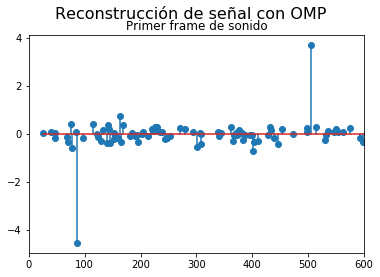

In [19]:
frame=0
idx_r, = result[frame].nonzero()
plt.xlim(0, 600)
plt.title("Primer frame de sonido")
plt.stem(idx_r, result[frame][idx_r], use_line_collection=True)
plt.suptitle('Reconstrucción de señal con OMP',
             fontsize=16)
plt.show()

### Reconstrucción Progresiva desde $K=1$ hasta $K=100$

In [20]:
Residuals=[]
for i in range(100):
  test_data = data[fs*60:fs*60+160].reshape(1, 160)
  result = np.ndarray((test_data.shape[0],512))
  from sklearn.decomposition import SparseCoder
  coder = SparseCoder(dictionary = D, transform_n_nonzero_coefs=i+1, transform_alpha=None, transform_algorithm="omp")
  result = coder.transform(test_data)
  orig = data[fs*60:fs*60+160]
  out = np.zeros(orig.shape)
  for n in range(result.shape[0]):
      out[n*160:(n+1)*160] = np.sum(D.T*result[n],axis=1)
  Residuals.append(np.sum((test_data-out)**2)**(1/2))
print(Residuals)

[2.0654720854635995, 1.589381286398132, 1.4194034091931982, 1.3784167004861199, 1.335591458679064, 1.30425815595183, 1.2736016401005288, 1.2441136265713646, 1.2088477536597269, 1.1716405795037832, 1.1350400831731144, 1.10129609713927, 1.0754264263965077, 1.0510249968730894, 1.0184892067197824, 0.9933787856349355, 0.9700134678584458, 0.9475507938741068, 0.9256212320706633, 0.9051795769577959, 0.8890523267837652, 0.8666026522582446, 0.8439305354237715, 0.8256340434721022, 0.8030373652633055, 0.7846636570086968, 0.7647009356128961, 0.7478010723299964, 0.7290095211286762, 0.7099193285112798, 0.6893766635717606, 0.6716816920990543, 0.6547183344928084, 0.6380295175603865, 0.6247268963657108, 0.6084365026123187, 0.593564467574283, 0.5784229236248187, 0.558893224343157, 0.5451687106165719, 0.5296822182557841, 0.5125478080958026, 0.4973433976404409, 0.4862022257167578, 0.47299836082845714, 0.45670045504899226, 0.43683790416396, 0.4236339113829347, 0.411140829226054, 0.40112109959134135, 0.38993

### Visualización $y$ y $y'$.
El error es tan pequeño en este caso que las señales se sobreposicionan.

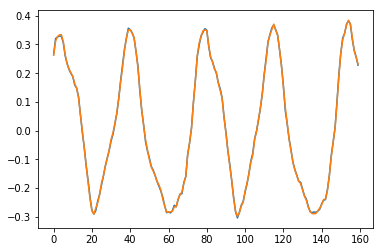

In [21]:
plt.plot(np.arange(160),out,np.arange(160),test_data.reshape(160))

### Visualización residuo $r$.

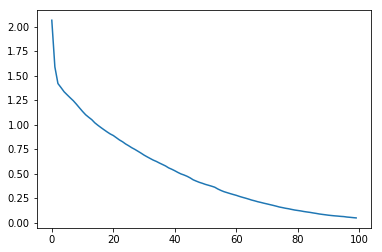

In [22]:
plt.plot(np.arange(100),Residuals)